# Hometask

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

1. Особенность материала: неоднородность самой выборки клеток, а она неоднородна почти всегда: из-за их размера, возраста, вида (в частности, так можно получить данные о новой разновидности клеток), получается что распределение будет иметь два пика.

2. Особенность обработки материала: при подготовке получилось много пустых шариков, их плохо отфильтровали, часть клеток повредилась, остались только некоторые ее части, может у нас слишком маленький датасет и по этой причине дуплеты очень сильно влияют на распределение итоговых данных.

Статьи, которые я нашла:

1. https://hbctraining.github.io/scRNA-seq/lessons/04_SC_quality_control.html (в основном про gene detected per cell)

2. Jiang, G., Tu, J., Zhou, L. et al. Single-cell transcriptomics reveal the heterogeneity and dynamic of cancer stem-like cells during breast tumor progression. Cell Death Dis 12, 979 (2021). https://doi.org/10.1038/s41419-021-04261-y

3. Zhu, Q., Zhao, X., Zhang, Y. et al. Single cell multi-omics reveal intra-cell-line heterogeneity across human cancer cell lines. Nat Commun 14, 8170 (2023)

-----------------

4*. Daniel Andersson, Firaol Tamiru Kebede, Mandy Escobar, Tobias Österlund, Anders Ståhlberg,
Principles of digital sequencing using unique molecular identifiers,
Molecular Aspects of Medicine,
Volume 96,
2024,
101253,
ISSN 0098-2997,
https://doi.org/10.1016/j.mam.2024.101253.

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [1]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

import scanpy as sc
import seaborn as sns
import numpy as np

Ссылка на страницу коллекцию: https://cellxgene.cziscience.com/collections/180bff9c-c8a5-4539-b13b-ddbc00d643e6

In [2]:
#загружаем дата сет

!wget https://datasets.cellxgene.cziscience.com/455636fa-13c0-41ff-897d-c8a1fe1c7623.h5ad

In [3]:
#считываем его

my_data = sc.read_h5ad('/content/455636fa-13c0-41ff-897d-c8a1fe1c7623.h5ad')
my_data.var_names_make_unique()

In [4]:
#посмотрели что внутри в частности на категории клеток
print(my_data.obs.cell_type)

SFG2_AAACCTGAGATGGCGT            oligodendrocyte
SFG2_AAACCTGAGCGATCCC            oligodendrocyte
SFG2_AAACCTGAGGAATCGC     mature microglial cell
SFG2_AAACCTGAGGATGCGT            oligodendrocyte
SFG2_AAACCTGAGGCACATG            oligodendrocyte
                                   ...          
SFG10_TTTGTCACATGACGGA    mature microglial cell
SFG10_TTTGTCAGTGTGGTTT           oligodendrocyte
SFG10_TTTGTCATCACGGTTA          GABAergic neuron
SFG10_TTTGTCATCATACGGT           oligodendrocyte
SFG10_TTTGTCATCTTCAACT          endothelial cell
Name: cell_type, Length: 63608, dtype: category
Categories (7, object): ['endothelial cell', 'oligodendrocyte', 'GABAergic neuron',
                         'glutamatergic neuron', 'oligodendrocyte precursor cell', 'mature astrocyte',
                         'mature microglial cell']


In [5]:
#и еще посмотрели
my_data.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSG00000100568,False,VTI1B,NCBITaxon:9606,gene,5768
ENSG00000101440,False,ASIP,NCBITaxon:9606,gene,845
ENSG00000249847,False,ENSG00000249847.1,NCBITaxon:9606,gene,646
ENSG00000136630,False,HLX,NCBITaxon:9606,gene,5629
ENSG00000231731,False,ENSG00000231731.7,NCBITaxon:9606,gene,5510
...,...,...,...,...,...
ENSG00000163162,False,RNF149,NCBITaxon:9606,gene,5326
ENSG00000185189,False,NRBP2,NCBITaxon:9606,gene,4934
ENSG00000188352,False,FOCAD,NCBITaxon:9606,gene,9754
ENSG00000008394,False,MGST1,NCBITaxon:9606,gene,7441


In [6]:
#берем интересную нам категорию

oli_data = my_data[my_data.obs.cell_type == 'oligodendrocyte']
oli_data.shape

(18360, 32743)

In [7]:
sc.pp.calculate_qc_metrics(
    oli_data,
    inplace=True,
    log1p=False,
    percent_top=None,
)

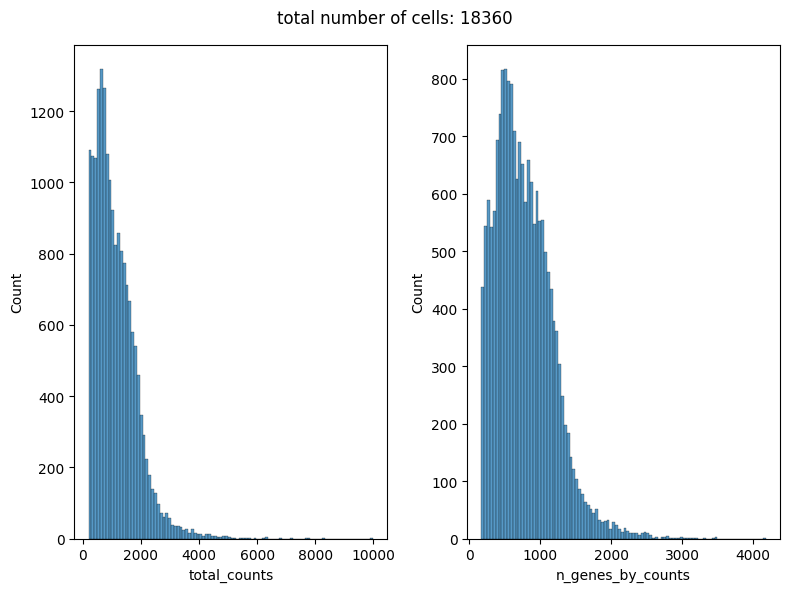

In [8]:
import matplotlib.pyplot as plt
# ок только пик у нуля

my_data1 = oli_data

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))

sns.histplot(my_data1.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(my_data1.obs.n_genes_by_counts, ax=axes[1], bins=100)

plt.suptitle(f"total number of cells: {len(my_data1)}")

fig.tight_layout()

In [9]:
# Step 2: doublets filtration
# import scrublet as scr

# scrub = scr.Scrublet(my_data1)

In [10]:
# print('Running UMAP...')
# scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.4))

# print('Done.')

In [11]:
# scrub.plot_embedding('UMAP', order_points=True);

<Axes: ylabel='Count'>

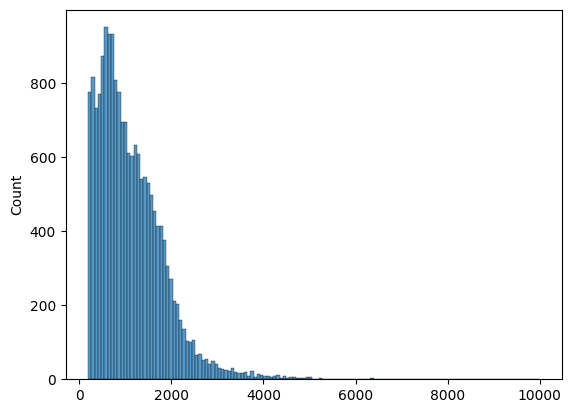

In [12]:
# UMI per cell distribution

counts_per_cell = my_data1.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

http://loompy.org/#:~:text=Loom%20files%20contain%20a%20main,MATLAB%2C%20Mathematica%2C%20and%20Julia.


Key features:

* Single file that can be moved around

* Metadata travels with the main data

* Data, clustering, layout, annotation stored together

* Out-of-memory data processing

* Open source


In [13]:
!pip install -U loompy
import loompy

In [16]:
oli_data.write_loom(filename = 'new_file.loom', write_obsm_varm=True)